**Import Library dan Database**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

#Menampilkan 5 Data Teratas 2019
print('Ukuran dataset : %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas 2019 : ')
dataset.head(5)

Ukuran dataset : 5000 baris dan 9 kolom

Lima data teratas 2019 : 


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [2]:
# Mengubah kolom order date dari "object" menjadi "datetime"
dataset['order_date'] = pd.to_datetime(dataset['order_date'])

In [3]:
#Mengecek type data dari order_date
dataset['order_date'].head(5)

0   2019-10-17
1   2019-10-24
2   2019-11-03
3   2019-08-19
4   2019-10-16
Name: order_date, dtype: datetime64[ns]

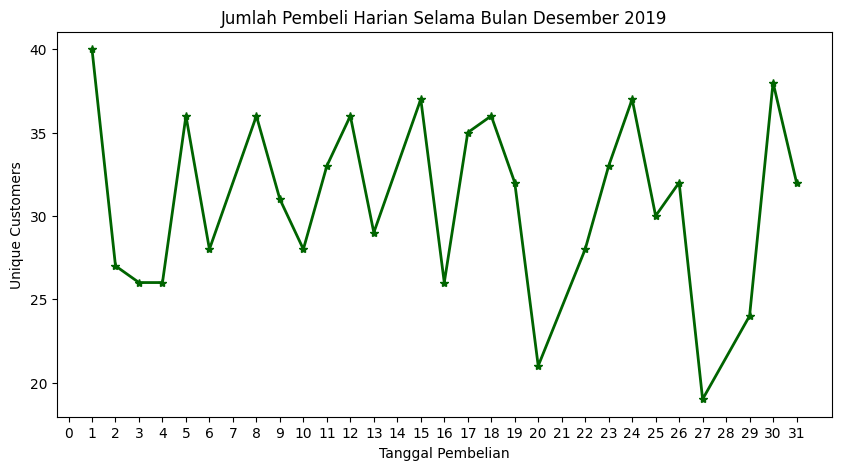

In [7]:
# Filter data untuk bulan Desember 2019
dataset_december2019 = dataset[(dataset['order_date'].dt.year == 2019) & (dataset['order_date'].dt.month == 12)]

# Menghitung jumlah unique customers per tanggal
daily_customers = dataset_december2019.groupby(dataset_december2019['order_date'].dt.day)['customer_id'].nunique()

# Mengatur ukuran figure
plt.figure(figsize=(10, 5))

# Membuat line chart jumlah pembeli harian
plt.plot(daily_customers.index, daily_customers.values, marker='*', linewidth=2, linestyle='-', color="darkgreen")

# Menambahkan judul dan label sumbu
plt.title('Jumlah Pembeli Harian Selama Bulan Desember 2019')
plt.xlabel('Tanggal Pembelian')
plt.ylabel('Unique Customers')
plt.xticks(range(0, 32))

# Menampilkan plot
plt.show()

**Case 1 : Menentukan Brand Top 5**

In [8]:
# Menghitung total quantity per brand
brand_quantity = dataset_december2019.groupby('brand')['quantity'].sum().reset_index()

# Mengurutkan berdasarkan total quantity secara descending
brand_quantity_sorted = brand_quantity.sort_values('quantity', ascending=False)

# Mengambil top 5 brand
top5_brand = brand_quantity_sorted.head(5)

# Menampilkan top 5 brand
print(top5_brand)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


**Case 2 : Multi-Line Chart Daily Quality untuk Brand Top 5**

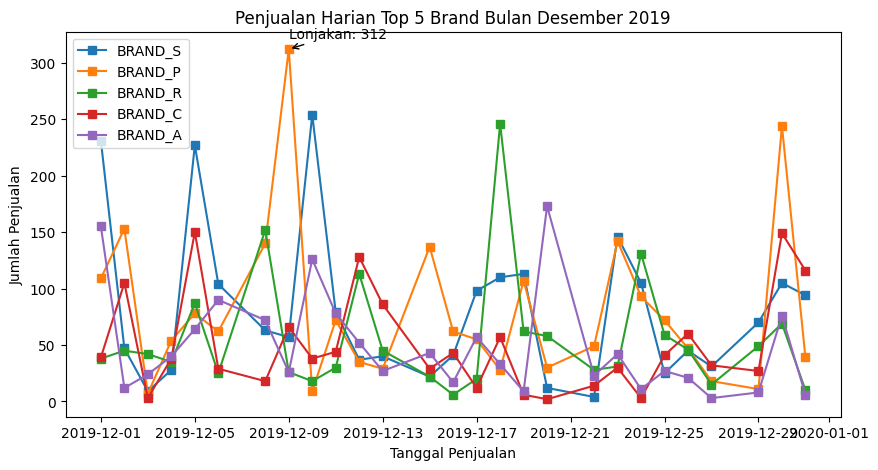

In [9]:
# Menghitung Kuantitas dan Brand
daily_quantity = dataset_december2019.groupby(['order_date', 'brand'])['quantity'].sum().reset_index()
top_5_brands = dataset_december2019.groupby('brand')['quantity'].sum().nlargest(5).index

# Mengatur Ukuran Figure
plt.figure(figsize=(10, 5))

# Membuat Garis Multi-Line Chart Dengan Titik Di Setiap Lonjakan
lonjakan_tanggal = None
lonjakan_quantity = None
for brand in top_5_brands:
    brand_data = daily_quantity[daily_quantity['brand'] == brand]
    plt.plot(brand_data['order_date'], brand_data['quantity'], marker='s', linestyle='-', label=brand)
    tanggal_lonjakan = brand_data.loc[brand_data['quantity'].idxmax(), 'order_date']
    quantity_lonjakan = brand_data.loc[brand_data['quantity'].idxmax(), 'quantity']
    if lonjakan_quantity is None or quantity_lonjakan > lonjakan_quantity:
        lonjakan_tanggal = tanggal_lonjakan
        lonjakan_quantity = quantity_lonjakan
plt.annotate(f'Lonjakan: {lonjakan_quantity}',
             xy=(lonjakan_tanggal, lonjakan_quantity),
             xytext=(lonjakan_tanggal, lonjakan_quantity + 10),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='left')

# Menambahkan Judul
plt.title('Penjualan Harian Top 5 Brand Bulan Desember 2019')

# Memberikan Label pada Sumbu x dan y
plt.xlabel('Tanggal Penjualan')
plt.ylabel('Jumlah Penjualan')

# Memberikan Legend / Kotak pada Kanan Atas
plt.legend(loc='upper left')

# Menampilkan Hasil
plt.show()

**Case 3 : Jumlah Produk Terlaku Selama Bulan Desember 2019**

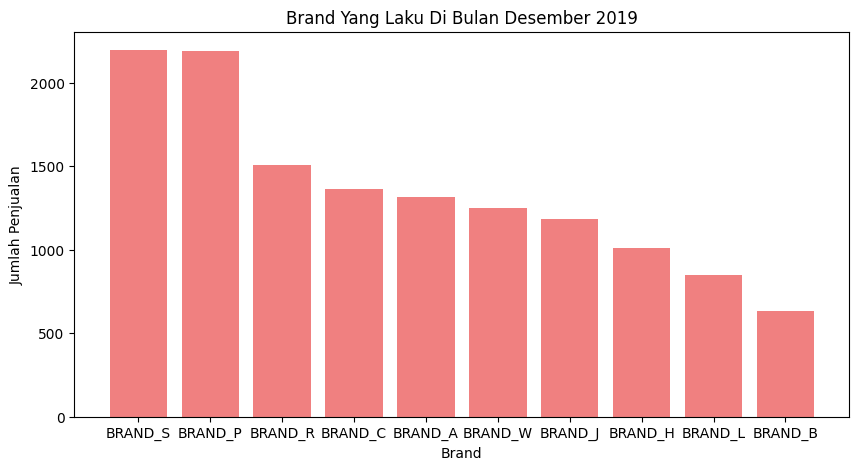

In [11]:
# Mengatur Ukuran Figure
plt.figure(figsize=(10,5))

# Membuat Bar Chart
plt.bar(brand_quantity_sorted['brand'], brand_quantity_sorted['quantity'], color='lightcoral')

# Menambahkan Judul
plt.title('Brand Yang Laku Di Bulan Desember 2019')

# Memberikan Label pada Sumbu x dan y
plt.xlabel('Brand')
plt.ylabel('Jumlah Penjualan')

# Menampilkan Hasil
plt.show()

**Case 4 : Penjualan Produk Di Atas 100 dan Di Bawah 100 Selama Bulan Desember 2019**

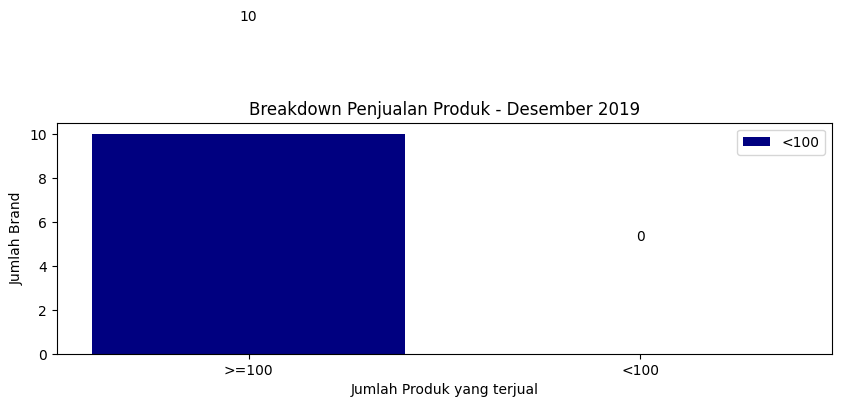

In [ ]:
# Membuat persamaan baru category
brand_quantity_sorted['category'] = pd.cut(brand_quantity_sorted['quantity'], bins=[0, 100, float('inf')], labels=['<100', '>=100'])

# Menghitung category
category_counts = brand_quantity_sorted['category'].value_counts()

# Mengatur Ukuran Figure
plt.figure(figsize=(10, 3))

# Membuat bar chart
plt.bar(category_counts.index, category_counts.values, color="navy")

# Memberikan Label pada Sumbu x dan y
plt.xlabel('Jumlah Produk yang terjual')
plt.ylabel('Jumlah Brand')

# Menambahkan Judul
plt.title('Breakdown Penjualan Produk - Desember 2019')

# Memberikan Legend / Kotak pada Kanan Atas
plt.legend(['<100', '>=100'])

# Menampilkan Hasil
for i, v in enumerate(category_counts.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.show()

**Kasus 5: Distribusi Harga Produk di Brand Top 5 (Histogram)**

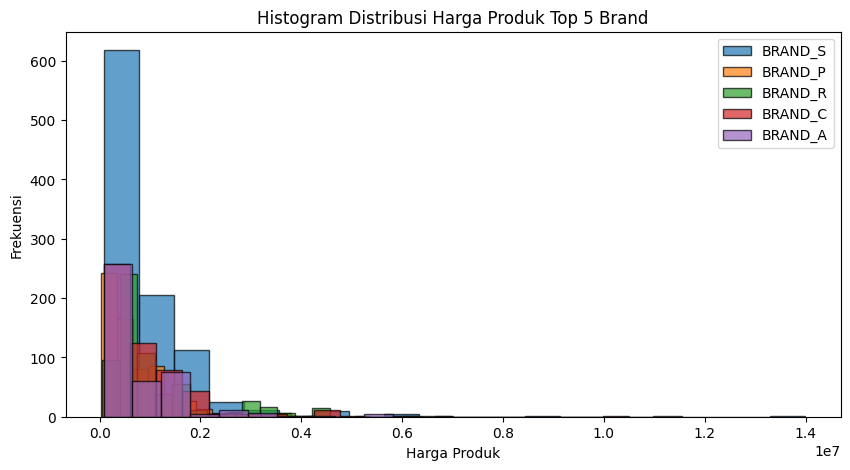

In [9]:
#Menentukan 5 Top Brands
top_5_brands = brand_quantity_sorted.head(5)

# Menentukan 5 Top Data
top_5_data = dataset[dataset['brand'].isin(top_5_brands['brand'])]

# Menghitung Top 5 Data Dengan Median (Nilai Tengah)
brand_median_prices = top_5_data.groupby('brand')['item_price'].median()

# Mengatur Ukuran Figure
plt.figure(figsize=(10, 5))

# Membuat Histogram Chart
for brand in top_5_brands['brand']:
    brand_data = top_5_data[top_5_data['brand'] == brand]
    plt.hist(brand_data['item_price'], bins=20, edgecolor='black', alpha=0.7, label=brand)

# Memberikan Label pada Sumbu x dan y
plt.xlabel('Harga Produk')
plt.ylabel('Frekuensi')

# Menambahkan Judul
plt.title('Histogram Distribusi Harga Produk Top 5 Brand')

# Memberikan Legend / Kotak pada Kanan Atas
plt.legend()

# Menampilkan Hasil
plt.show()

**Kasus 6a: Korelasi Quantity vs GMV**

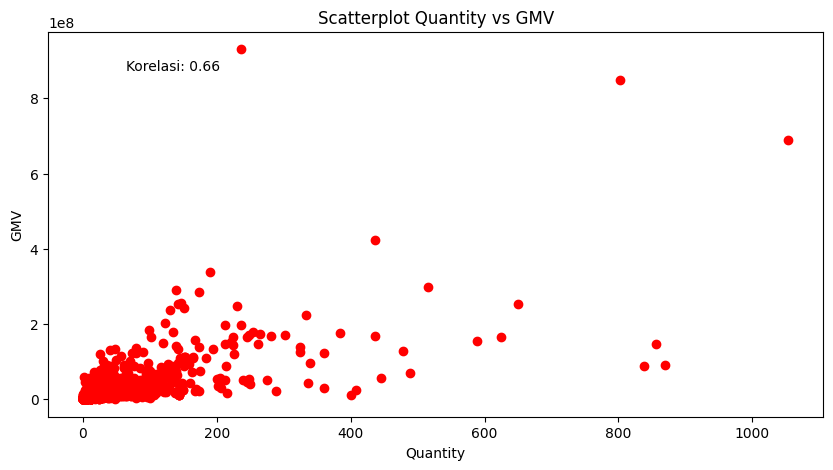

In [12]:
# Mencari GMV dari Perkalian Quantity dan Item Price
dataset['GMV'] = dataset['quantity'] * dataset['item_price']

# Menentukan data product menggunakan aggregasi
data_product = dataset.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()

# Mengatur Ukuran Figure
plt.figure(figsize=(10, 5))

# Membuat Scatter Plot
plt.scatter(data_product['quantity'], data_product['GMV'],color='red')

# Memberikan Label pada Sumbu x dan y
plt.xlabel('Quantity')
plt.ylabel('GMV')

# Menambahkan Judul
plt.title('Scatterplot Quantity vs GMV')

# Mengkorelasikan Quantitas dan GMV
correlation_gmv = data_product['quantity'].corr(data_product['GMV'])
plt.text(0.1, 0.9, f'Korelasi: {correlation_gmv:.2f}', transform=plt.gca().transAxes)

# Menampilkan Hasil
plt.show()

**Kasus 6b: Korelasi Median Harga vs Quantity**

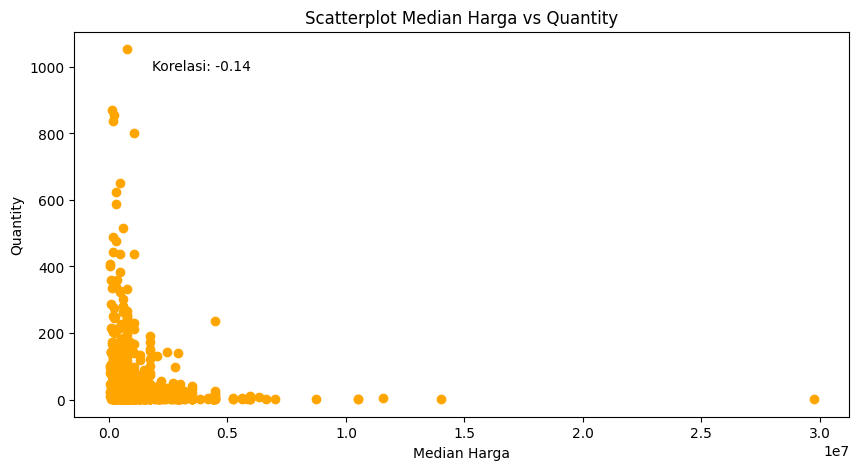

In [ ]:
# Mencari GMV dari Perkalian Quantity dan Item Price
dataset['GMV'] = dataset['quantity'] * dataset['item_price']

# Menentukan data product menggunakan aggregasi
data_product = dataset.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'
}).reset_index()

# Mengatur Ukuran Figure
plt.figure(figsize=(10, 5))

# Membuat Scatter Plot
plt.scatter(data_product['item_price'], data_product['quantity'], color="orange")

# Memberikan Label pada Sumbu x dan y
plt.xlabel('Median Harga')
plt.ylabel('Quantity')

# Menambahkan Judul
plt.title('Scatterplot Median Harga vs Quantity')

# Mengkorelasikan Median Harga & Kuantitas
correlation_price = data_product['item_price'].corr(data_product['quantity'])
plt.text(0.1, 0.9, f'Korelasi: {correlation_price:.2f}', transform=plt.gca().transAxes)

# Menampilkan Hasil
plt.show()